In [1]:
%matplotlib inline
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
#import more_itertools as mit
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True






blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')
!radical-stack

/opt/anaconda2/lib/python2.7/site-packages/radical/pilot
/opt/anaconda2/lib/python2.7/site-packages/radical/utils
/opt/anaconda2/lib/python2.7/site-packages/radical/entk
/opt/anaconda2/lib/python2.7/site-packages/radical/saga
/opt/anaconda2/lib/python2.7/site-packages/radical/analytics

  python               : 2.7.14
  pythonpath           : 
  virtualenv           : /home/aymen/jupyter

  radical.analytics    : 0.70.0
  radical.entk         : 0.70.0
  radical.pilot        : 0.70.0
  radical.saga         : 0.70.0
  radical.utils        : 0.70.0



In [2]:
stage_0_units = pd.read_csv('../Data/units_durations_satge0.csv')
train_stage_0_units = stage_0_units
train_stage_0_units.reset_index(drop='index',inplace=True)

stage_1_units = pd.read_csv('../Data/units_durations_satge1.csv')
train_stage_1_units = stage_1_units
train_stage_1_units.reset_index(drop='index',inplace=True)


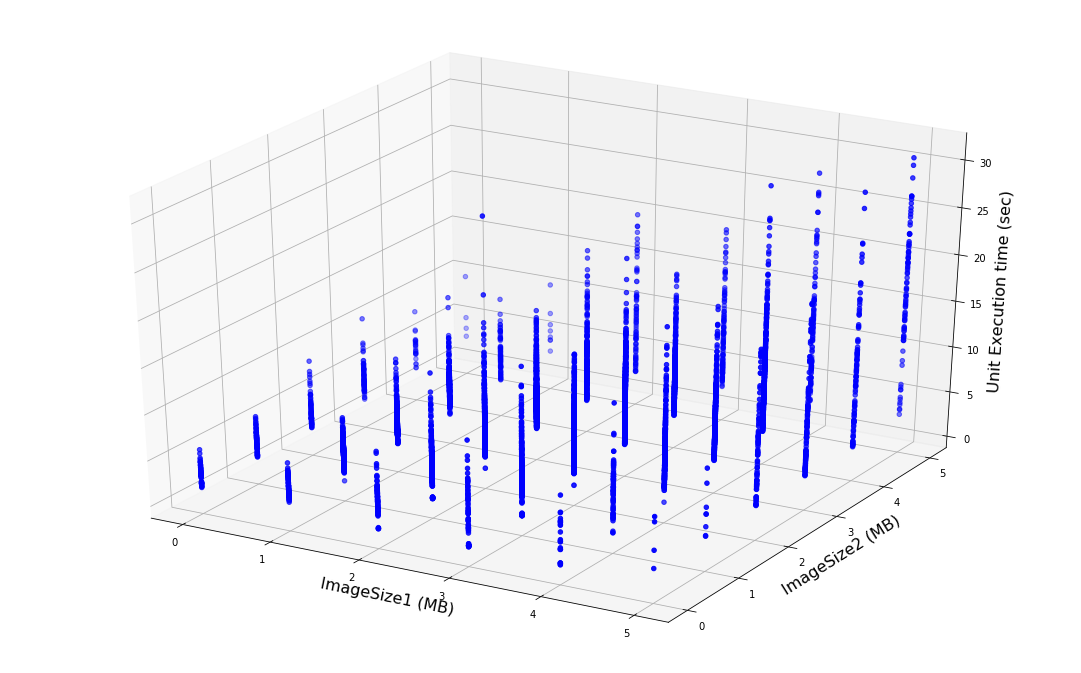

In [23]:
fig = plt.figure(figsize=(19,12))
ax = fig.add_subplot(111, projection="3d")
x_vals = stage_0_units['ImageSize1'].values
y_vals = stage_0_units['ImageSize2'].values
z_vals = stage_0_units['TTX'].values

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('ImageSize1 (MB)', size = 16)
ax.set_ylabel('ImageSize2 (MB)', size = 16)
ax.set_zlabel('Unit Execution time (sec)', size = 16)

plt.show()

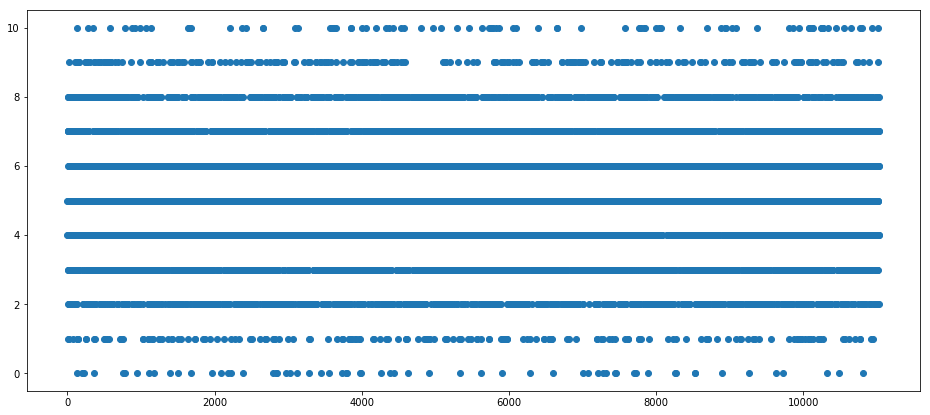

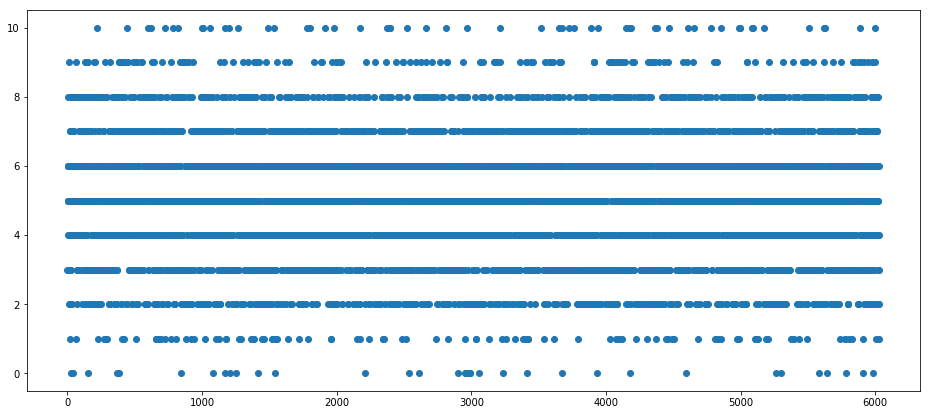

In [3]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(16,7),sharey='row')
_ = axis.scatter(range(len(stage_0_units)),stage_0_units['ImageSize1'].values + stage_0_units['ImageSize2'].values)

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(16,7),sharey='row')
_ = axis.scatter(range(len(stage_1_units)),stage_1_units['ImageSize1'].values + stage_1_units['ImageSize2'].values)

In [42]:
stage_0_units.sort_values(by='ImageSize1',inplace=True)
stage_0_units.reset_index(drop='index',inplace=True)


stage_0_tasks3 = stage_0_units.reset_index(drop='index')


train_stage_0_ranges = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])

for i in range(0,11028,300): # This is 92% of the images there are ranges that have 0 samples after 10800KBs
    train_stage_0_ranges.loc[len(train_stage_0_ranges)] = [[i, i + 300],stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['ImageSize1'].values,
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['ImageSize1'].values.mean(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['ImageSize1'].values.std(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['ImageSize1'].values.min(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['ImageSize1'].values.max(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['TTX'].values,
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['TTX'].values.mean(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['TTX'].values.std(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['TTX'].values.min(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize1']) & (stage_0_tasks3['ImageSize1'] < (i + 300))]['TTX'].values.max()]
    

ValueError: zero-size array to reduction operation minimum which has no identity

In [48]:
sorted(stage_0_tasks3['ImageSize2'].values)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
def func_lin(x, a, b):
    return a * x + b

xdata = train_stage_0_ranges['SizeMean'].values
ydata = train_stage_0_ranges['TimeMean'].values
poptTillingDes1lin, pcovTillingDes1lin = curve_fit(func_lin,xdata,ydata)
y = func_lin(xdata, *poptTillingDes1lin)
s_test = np.sqrt(np.sum(np.power((train_stage_0_ranges['TimeMean'].values - y), 2))/(len(y)-2))
print 'Linear: R-squared', r2_score(train_stage_0_ranges['TimeMean'].values,y), '$S_{error}$', s_test
print 'Parameter Values', poptTillingDes1lin

TypeError: Improper input: N=2 must not exceed M=1

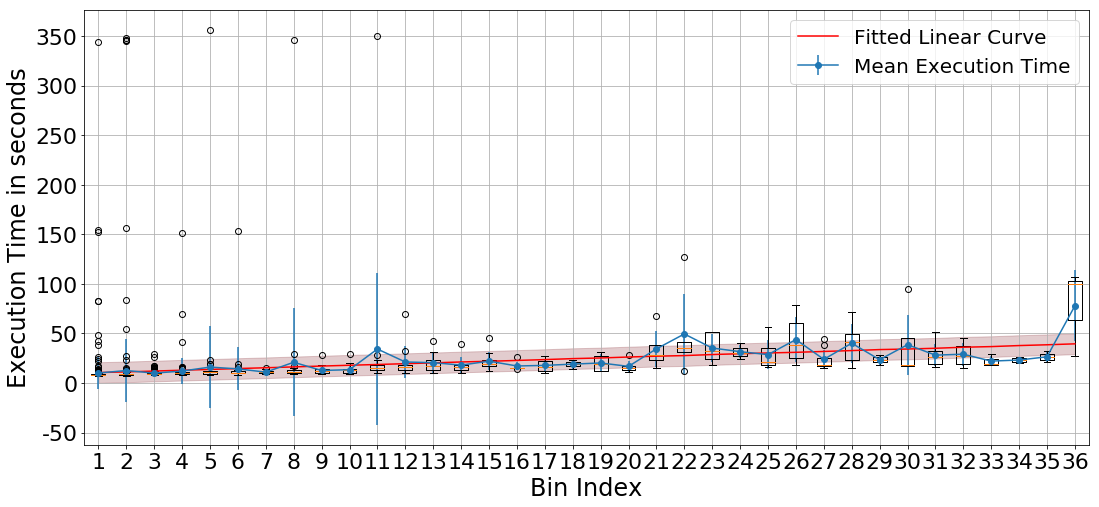

In [5]:
x = train_stage_0_ranges['SizeMean'].values

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(18,8),sharey='row')
_ = axis.boxplot(train_stage_0_ranges['TimeArray'].values)
_ = axis.errorbar(range(1,37),train_stage_0_ranges['TimeMean'].values,yerr=train_stage_0_ranges['TimeStd'].values,marker='o',label='Mean Execution Time')
_ = axis.plot(range(1,37), y, 'r-', label="Fitted Linear Curve")
_ = axis.fill_between(range(1,37),y - s_test, y + s_test, color=reds(250), alpha=0.2)
_ = axis.set_ylabel('Execution Time in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
fig.savefig('../Data/stage_0_tx_box.pdf',dpi=800,bbox_inches='tight')